In [1]:
using LinearAlgebra
using Distributions
using DelimitedFiles
using BAT
using DataStructures
using CairoMakie
using DataFrames

In [2]:
flux_chunks = []
for i in 19:-1:0
    idx = i*103 + 3: (i+1)*103
    push!(flux_chunks, Float32.(readdlm("spl-nu-20-01-000.d")[idx, 2:5]))
end

In [3]:
log10_energy_values = LinRange(-1, 4, 101)

101-element LinRange{Float64, Int64}:
 -1.0, -0.95, -0.9, -0.85, -0.8, -0.75, …, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0

In [4]:
cz_flux_bins = LinRange(-1, 1, 21);
energy_flux_values = 10 .^ log10_energy_values;

In [5]:
cz_flux_values = LinRange(-0.95, 0.95, 20);

In [6]:
hkkm_flux = permutedims(stack(flux_chunks), [1, 3, 2]);

In [7]:
using Interpolations

In [8]:
flux = OrderedDict()

OrderedDict{Any, Any}()

In [9]:
flux[:numu] = cubic_spline_interpolation((log10_energy_values, cz_flux_values), hkkm_flux[:, :, 1], extrapolation_bc = Line());
flux[:numubar] = cubic_spline_interpolation((log10_energy_values, cz_flux_values), hkkm_flux[:, :, 2], extrapolation_bc = Line());
flux[:nue] = cubic_spline_interpolation((log10_energy_values, cz_flux_values), hkkm_flux[:, :, 3], extrapolation_bc = Line());
flux[:nuebar] = cubic_spline_interpolation((log10_energy_values, cz_flux_values), hkkm_flux[:, :, 4], extrapolation_bc = Line());

In [10]:
cz = -1:0.01:1
log10e = -1:0.01:4

-1.0:0.01:4.0

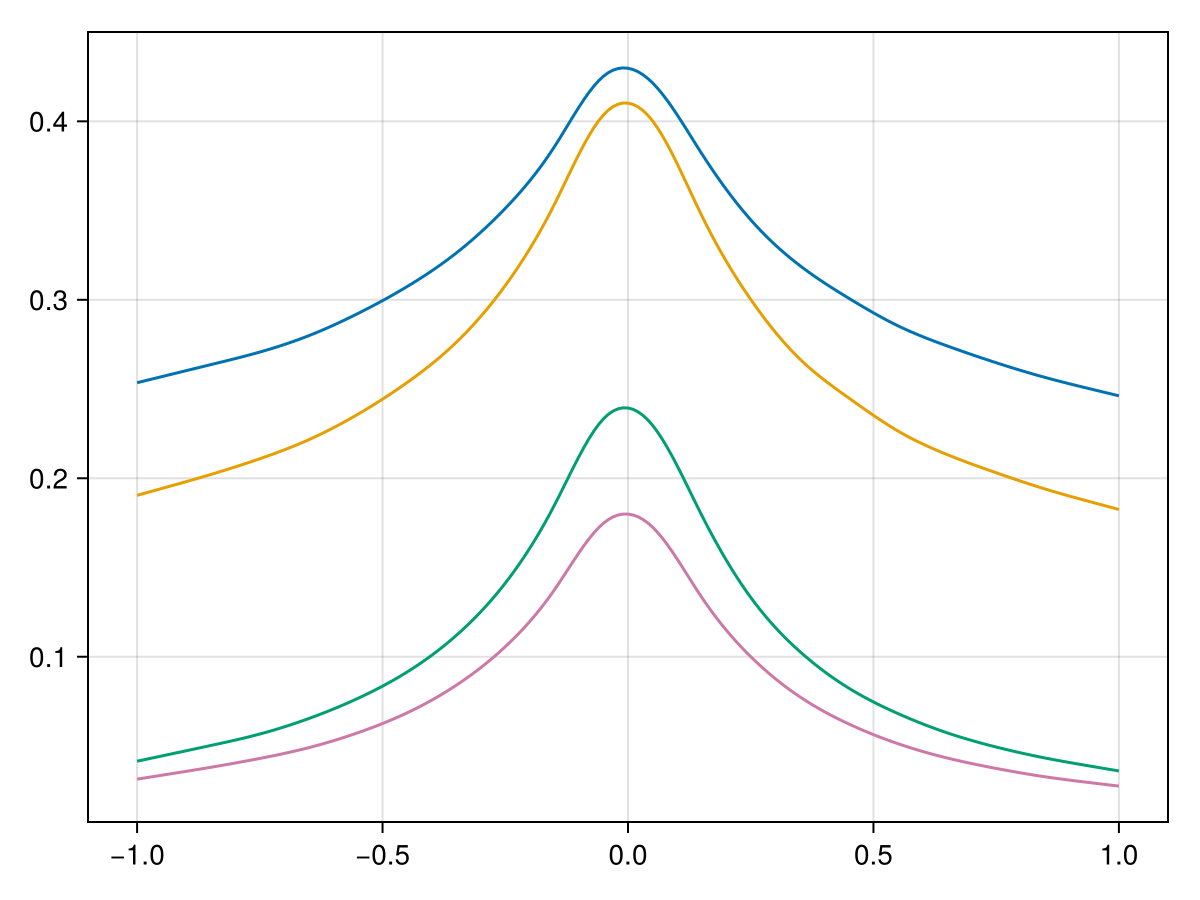

In [11]:
fig = Figure()
ax = Axis(fig[1, 1])
e = 1
lines!(ax, cz, flux[:numu].(e, cz))
lines!(ax, cz, flux[:numubar].(e, cz))
lines!(ax, cz, flux[:nue].(e, cz))
lines!(ax, cz, flux[:nuebar].(e, cz))
fig

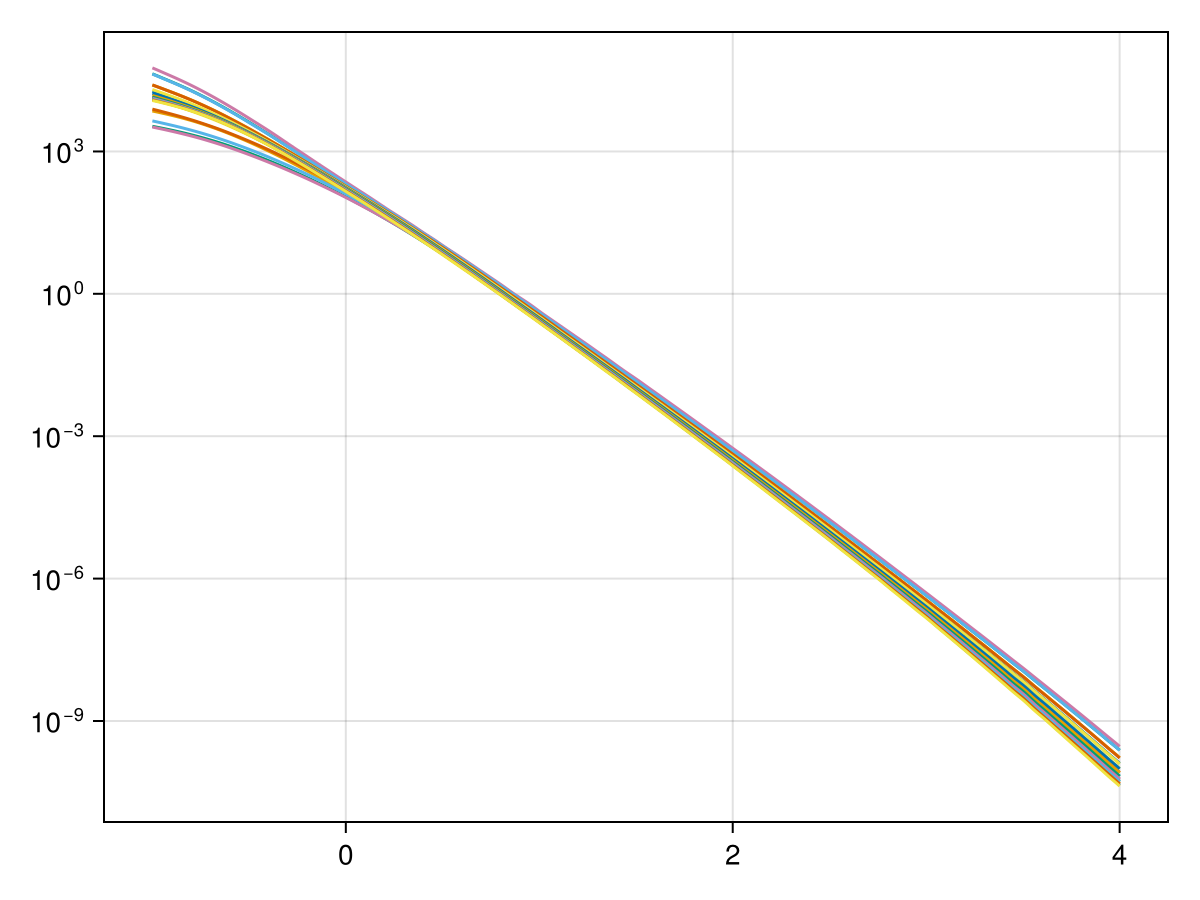

In [12]:
fig = Figure()
ax = Axis(fig[1, 1]; yscale=log10)
for cz in -1:0.1:1
    lines!(ax, log10e, flux[:numu].(log10e, cz))
end
fig

In [13]:
using CSV

In [14]:
mc_nu = CSV.read(joinpath("neutrino_mc.csv"), DataFrame; header=true);

In [15]:
hist_mu = CSV.read(joinpath("muons.csv"), DataFrame; header=true);

In [16]:
hist_data = CSV.read(joinpath("data.csv"), DataFrame; header=true);

In [17]:
hyperplanes_all_nc = CSV.read(joinpath("hyperplanes_all_nc.csv"), DataFrame; header=true);
hyperplanes_nue_cc = CSV.read(joinpath("hyperplanes_nue_cc.csv"), DataFrame; header=true);
hyperplanes_numu_cc = CSV.read(joinpath("hyperplanes_numu_cc.csv"), DataFrame; header=true);
hyperplanes_nutau_cc = CSV.read(joinpath("hyperplanes_nutau_cc.csv"), DataFrame; header=true);

In [18]:
reco_energy_bin_edges = [5.623413,  7.498942, 10. , 13.335215, 17.782795, 23.713737, 31.622776, 42.16965 , 56.23413]
reco_coszen_bin_edges = [-1., -0.75, -0.5 , -0.25,  0., 0.25, 0.5, 0.75, 1.]
pid_bin_edges = -0.5:1:1.5
type_bin_edges = [-0.5, 0.5, 3.5]

3-element Vector{Float64}:
 -0.5
  0.5
  3.5

In [19]:
using StatsBase

In [20]:
muon_histo = fit(Histogram, (hist_mu.reco_energy, hist_mu.reco_coszen, hist_mu.pid), weights(hist_mu.count), (reco_energy_bin_edges, reco_coszen_bin_edges, pid_bin_edges)).weights
muon_histo_abs_uncert = fit(Histogram, (hist_mu.reco_energy, hist_mu.reco_coszen, hist_mu.pid), weights(hist_mu.abs_uncert), (reco_energy_bin_edges, reco_coszen_bin_edges, pid_bin_edges)).weights

8×8×2 Array{Float64, 3}:
[:, :, 1] =
 1.21708  2.72346  1.67064  3.04865  1.64254   2.94666  1.52093   1.48547
 2.49286  3.4142   4.53764  5.06559  2.40605   1.88694  2.22315   4.62524
 2.72346  2.13757  2.78584  2.00024  2.82236   6.04332  2.45043   6.18337
 5.09299  1.91197  2.47738  5.74346  9.53021   3.26136  8.53483   6.93141
 4.47374  3.14321  3.33892  4.57634  3.34256  11.7321   4.85843   6.24861
 2.13436  4.74325  2.46363  2.89639  3.34857   7.89187  4.20804  10.8736
 1.25832  2.20784  2.23023  3.93309  4.72431   5.55795  5.53983   5.40263
 1.22022  2.07122  2.07122  2.44149  2.09977   2.83537  7.46986   3.55884

[:, :, 2] =
 0.909267  4.04704  1.04568  2.63509  3.15086   2.72998   3.32528   1.55485
 2.15024   1.44931  2.09556  4.26177  1.52098   1.55531   1.57297   3.28613
 3.32528   1.20408  1.81636  4.46443  2.23023   4.12376   5.26414   5.53243
 2.40461   1.98345  1.32518  1.89429  2.62557   3.85729   3.83736   3.84252
 1.16125   2.54806  3.25865  2.31462  2.61925   5.54387

In [21]:
data_histo = Int.(fit(Histogram, (hist_data.reco_energy, hist_data.reco_coszen, hist_data.pid), weights(hist_data.count), (reco_energy_bin_edges, reco_coszen_bin_edges, pid_bin_edges)).weights)

8×8×2 Array{Int64, 3}:
[:, :, 1] =
 254  418  447  429  360  217  100   31
 338  480  623  600  531  380  210   93
 406  533  736  773  679  609  408  229
 395  550  668  778  728  669  533  366
 350  460  573  679  733  675  530  418
 239  302  430  498  560  538  429  307
 136  216  297  390  409  348  268  205
  98  150  197  239  252  215  177  112

[:, :, 2] =
 196  210  242  224  177   97   67   43
 176  171  247  206  197  136  103   66
 216  194  253  281  269  204  167  118
 177  208  262  336  374  299  202  175
 182  212  326  464  421  392  265  216
 133  217  342  496  454  360  267  177
 121  224  295  389  427  315  224  109
 129  192  242  313  281  226  139   58

In [22]:
mc_nu.e_idx = searchsortedfirst.(Ref(reco_energy_bin_edges), mc_nu.reco_energy) .- 1
mc_nu.c_idx = searchsortedfirst.(Ref(reco_coszen_bin_edges), mc_nu.reco_coszen) .- 1
mc_nu.p_idx = searchsortedfirst.(Ref(pid_bin_edges), mc_nu.pid) .- 1
mc_nu.t_idx = searchsortedfirst.(Ref(type_bin_edges), mc_nu.type) .- 1

795502-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [23]:
mc_nu

Row,pdg,pid,reco_coszen,reco_energy,true_coszen,true_energy,type,weight,e_idx,c_idx,p_idx,t_idx
,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Int64,Int64,Int64,Int64
1,12,1,0.125,6.6,-0.166886,3.12526,3,1.95725e-10,1,5,2,2
2,12,0,-0.625,6.6,0.0840211,3.59735,2,2.87952e-10,1,2,1,2
3,12,0,-0.375,8.7,-0.0245363,3.4476,2,2.56374e-10,2,3,1,2
4,12,0,-0.125,11.7,-0.684406,2.93245,1,1.63997e-10,3,4,1,2
5,12,0,-0.625,8.7,0.0346757,2.99903,1,1.74413e-10,2,2,1,2
6,12,0,-0.125,6.6,-0.230042,2.67212,3,1.27412e-10,1,4,1,2
7,12,0,0.875,8.7,0.640466,3.66991,2,3.04719e-10,2,8,1,2
8,12,1,0.125,6.6,-0.471117,3.7195,2,3.15472e-10,1,5,2,2
9,12,0,0.125,8.7,-0.257905,2.91426,2,1.6145e-10,2,5,1,2


In [24]:
using Newtrinos

In [25]:
L1 = 19.
R = 6378.2 + L1
function cz_to_L(cz)
    zen = acos.(cz)
    phi = asin.((1-L1/R) * sin.(zen))
    psi = zen .- phi
    sqrt.((R-L1)^2 + R^2 .- (2*(R-L1) * R * cos.(psi)))
end

cz_to_L (generic function with 1 method)

In [26]:
using Zygote

In [27]:
using BenchmarkTools

In [28]:
withgradient(flux[:nue], 1,1)

(val = 0.035986163705173456, grad = (-0.30331879854202265, -0.04661662814517816))

In [29]:
cz_fine_bins = LinRange(-1,1, 201)
log10e_fine_bins = LinRange(0,3,201)

201-element LinRange{Float64, Int64}:
 0.0, 0.015, 0.03, 0.045, 0.06, 0.075, 0.09, …, 2.94, 2.955, 2.97, 2.985, 3.0

In [41]:
e_fine_bins = 10 .^log10e_fine_bins;

In [42]:
l_fine_bins = cz_to_L(cz_fine_bins);

In [43]:
e_fine = 0.5 .* (e_fine_bins[1:end-1] .+ e_fine_bins[2:end]);
l_fine = 0.5 .* (l_fine_bins[1:end-1] .+ l_fine_bins[2:end]);

In [44]:
params_dict = OrderedDict()
params_dict[:deepcore_lifetime] = 2.5
params_dict[:deepcore_atm_muon_scale] = 1.0

1.0

In [45]:
mc_nu.log10_true_energy = log10.(mc_nu.true_energy)
mc_nu.l = cz_to_L(mc_nu.true_coszen);

In [46]:
mc_nu.ef_idx = searchsortedfirst.(Ref(log10e_fine_bins), mc_nu.log10_true_energy) .- 1
mc_nu.cf_idx = searchsortedfirst.(Ref(cz_fine_bins), mc_nu.true_coszen) .- 1

795502-element Vector{Int64}:
  84
 109
  98
  32
 104
  77
 165
  53
  75
  47
 118
 106
 123
   ⋮
  95
  77
  89
  28
  73
  40
 143
  84
 145
  27
  18
 111

In [47]:
mc = OrderedDict()

OrderedDict{Any, Any}()

In [48]:
mc[:nue] = mc_nu[mc_nu.pdg .== 12, :]
mc[:nuebar] = mc_nu[mc_nu.pdg .== -12, :]
mc[:numu] = mc_nu[mc_nu.pdg .== 14, :]
mc[:numubar] = mc_nu[mc_nu.pdg .== -14, :]
mc[:nutau] = mc_nu[mc_nu.pdg .== 16, :]
mc[:nutaubar] = mc_nu[mc_nu.pdg .== -16, :]

Row,pdg,pid,reco_coszen,reco_energy,true_coszen,true_energy,type,weight,e_idx,c_idx,p_idx,t_idx,log10_true_energy,l,ef_idx,cf_idx
,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Int64,Int64,Int64,Int64,Float64,Float64,Int64,Int64
1,-16,0,0.625,8.7,0.850807,8.84088,2,2.92615e-9,2,7,1,2,0.946496,22.3191,64,186
2,-16,0,0.375,11.7,0.539387,7.90468,1,2.11229e-9,3,6,1,2,0.897885,35.0986,60,154
3,-16,0,-0.625,8.7,-0.112069,9.71287,2,3.81281e-9,2,2,1,2,0.987348,1582.94,66,89
4,-16,0,-0.625,15.6,-0.303866,8.74344,3,2.83453e-9,4,2,1,2,0.941682,3937.88,63,70
5,-16,0,0.125,6.6,0.550843,8.35092,2,2.48356e-9,1,5,1,2,0.921734,34.3758,62,156
6,-16,1,-0.625,8.7,-0.995494,9.3353,3,3.39872e-9,2,2,2,2,0.970128,12718.0,65,1
7,-16,0,-0.625,6.6,-0.761305,6.21679,2,1.04623e-9,1,2,1,2,0.793566,9736.45,53,24
8,-16,0,-0.375,6.6,-0.143835,9.11394,2,3.1859e-9,1,3,1,2,0.959706,1958.74,64,86
9,-16,0,-0.375,8.7,-0.729606,6.09981,1,9.82851e-10,2,3,1,2,0.785317,9333.15,53,28


In [49]:
flavs = [:nue, :numu, :nutau]

3-element Vector{Symbol}:
 :nue
 :numu
 :nutau

In [50]:
for anti in ["", "bar"]
    for flav in flavs
        flav = Symbol(flav, anti)
        for key in [:nue, :numu]
            fkey = Symbol(key, anti)
            mc[flav][!, "flux_" * String(key)] = flux[fkey].(mc[flav].log10_true_energy, mc[flav].true_coszen);
        end
    end
end

In [51]:
mc[:nuebar]

Row,pdg,pid,reco_coszen,reco_energy,true_coszen,true_energy,type,weight,e_idx,c_idx,p_idx,t_idx,log10_true_energy,l,ef_idx,cf_idx,flux_nue,flux_numu
,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Int64,Int64,Int64,Int64,Float64,Float64,Int64,Int64,Float64,Float64
1,-12,0,0.125,15.6,0.0652033,3.94487,3,4.2607e-10,4,5,1,2,0.596033,228.859,40,107,2.51269,5.38517
2,-12,0,-0.125,11.7,-0.267443,3.7585,1,3.7178e-10,3,4,1,2,0.575014,3481.33,39,74,2.19367,5.23654
3,-12,0,0.375,15.6,-0.330905,3.07937,1,2.11744e-10,4,6,1,2,0.488462,4277.9,33,67,3.63601,8.72652
4,-12,1,-0.125,6.6,-0.845909,3.24957,3,2.46877e-10,1,4,2,2,0.511825,10813.2,35,16,1.63536,5.41896
5,-12,0,0.625,6.6,0.103809,3.78142,1,3.78534e-10,1,7,1,2,0.577655,163.191,39,111,2.69726,5.87691
6,-12,0,0.625,6.6,-0.213566,3.58633,1,3.25758e-10,1,7,1,2,0.55465,2810.69,37,79,2.73129,6.24482
7,-12,1,-0.375,15.6,-0.277092,2.25345,1,8.67443e-11,4,3,2,2,0.352849,3602.08,24,73,9.52274,21.5109
8,-12,0,0.125,6.6,0.0840798,2.06339,2,6.73048e-11,1,5,1,2,0.314582,191.957,21,109,14.6691,30.4105
9,-12,0,-0.875,6.6,-0.873734,3.2691,1,2.50657e-10,1,1,1,2,0.514428,11167.4,35,13,1.57706,5.30932


## ...data is now prepared...

In [52]:
# function reweight(mc, params, osc_prob)

#     p_nu = osc_prob(e_fine, l_fine, params);
#     p_nubar = osc_prob(e_fine, l_fine, params, anti=true);


#     osc_flux = OrderedDict()
    
#     for i in 1:3
#         flav = flavs[i]
#         p_nue_interp = linear_interpolation((log10e_fine, cz_fine), p_nu[:,:,1,i], extrapolation_bc = Flat());
#         p_numu_interp = linear_interpolation((log10e_fine, cz_fine), p_nu[:,:,2,i], extrapolation_bc = Flat());
    
#         p_nue = p_nue_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
#         p_numu = p_numu_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
    
#         osc_flux[flav] = p_nue .* mc[flav].flux_nue .+ p_numu .* mc[flav].flux_numu
#     end
    
#     for i in 1:3
#         flav = Symbol(flavs[i], "bar")
#         p_nue_interp = linear_interpolation((log10e_fine, cz_fine), p_nubar[:,:,1,i], extrapolation_bc = Flat());
#         p_numu_interp = linear_interpolation((log10e_fine, cz_fine), p_nubar[:,:,2,i], extrapolation_bc = Flat());
    
#         p_nue = p_nue_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
#         p_numu = p_numu_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
    
#         osc_flux[flav] = p_nue .* mc[flav].flux_nuebar .+ p_numu .* mc[flav].flux_numubar
#     end

#     osc_flux
# end

In [53]:
function make_hist(e_idx, c_idx, p_idx, t_idx, w, size=(8,8,2,2))

    hist = Zygote.Buffer(w, size)
    
    for i in 1:prod(size)
        hist[i] = 0.
    end
        
    for i in 1:length(w)
        hist[e_idx[i], c_idx[i], p_idx[i], t_idx[i]] += w[i]
    end

    copy(hist)
end

make_hist (generic function with 2 methods)

In [70]:
channels = collect(keys(mc))

6-element Vector{Any}:
 :nue
 :nuebar
 :numu
 :numubar
 :nutau
 :nutaubar

In [108]:
Int.(ceil.(collect(1:6)./2))

6-element Vector{Int64}:
 1
 1
 2
 2
 3
 3

In [113]:
function reweight_per_channel(p, mc, out)
    pmce = [p[ef_idx, cf_idx, 1, out] for (ef_idx, cf_idx) in zip(mc.ef_idx, mc.cf_idx)]
    pmcmu = [p[ef_idx, cf_idx, 2, out] for (ef_idx, cf_idx) in zip(mc.ef_idx, mc.cf_idx)]

    return pmce .* mc.flux_nue .+ pmcmu .* mc.flux_numu
end

reweight_per_channel (generic function with 2 methods)

In [114]:
function reweight(mc, params, osc_prob)

    p = [osc_prob(e_fine, l_fine, params), osc_prob(e_fine, l_fine, params, anti=true)]

    [reweight_per_channel(p[(i+1)%2+1], mc[channels[i]], Int(ceil(i/2))) for i in 1:length(channels)]

    # flav = Symbol(flavs[i], anti[j])
    # #p_nue_interp = linear_interpolation((log10e_fine, cz_fine), p[j][:,:,1,i], extrapolation_bc = Flat());
    # #p_numu_interp = linear_interpolation((log10e_fine, cz_fine), p[j][:,:,2,i], extrapolation_bc = Flat());

    # pmce = [p[j][ef_idx, cf_idx, 1, 1] for (ef_idx, cf_idx) in zip(mc[flav].ef_idx, mc[flav].cf_idx)]
    # pmcmu = [p[j][ef_idx, cf_idx, 2, 1] for (ef_idx, cf_idx) in zip(mc[flav].ef_idx, mc[flav].cf_idx)]

    # return pmce .* mc[flav].flux_nue .+ pmcmu .* mc[flav].flux_numu
    
    # osc_flux = [
    
    #     begin
    #         flav = Symbol(flavs[i], anti[j])
    #         pmce = [p[j][ef_idx, cf_idx, 1, 1] for (ef_idx, cf_idx) in zip(mc[flav].ef_idx, mc[flav].cf_idx)]
    #         pmcmu = [p[j][ef_idx, cf_idx, 2, 1] for (ef_idx, cf_idx) in zip(mc[flav].ef_idx, mc[flav].cf_idx)]
        
    #         sum(pmce .* mc[flav].flux_nue .+ pmcmu .* mc[flav].flux_numu)
    #     end
    #         for i in 1:3 for j in 1:2
    #                 ]

    # osc_flux
end

reweight (generic function with 1 method)

In [111]:
p = NamedTuple(merge(Newtrinos.osc.standard.params, params_dict))

(θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, deepcore_lifetime = 2.5, deepcore_atm_muon_scale = 1.0)

In [115]:
reweight(mc, p, Newtrinos.osc.standard.osc_prob)

6-element Vector{Vector{Float64}}:
 [5.498542789158268, 4.192468395276328, 4.928346421241417, 3.174703630259936, 7.134726655179259, 8.137167847600946, 1.7136452065884367, 2.0827887716715887, 6.173368412837103, 4.576561514883414  …  0.0041077541611270465, 0.0013525494906741669, 0.0003244374123203514, 0.00025083957419680164, 0.001990110436042873, 0.002296058043956357, 0.04163745543925946, 0.0007055421130147205, 0.0040384249603684415, 0.0005608251197303168]
 [2.5151618063179937, 2.1916069995393235, 4.0155133712271125, 2.019213007652797, 2.698730952254082, 2.7640913229077757, 10.336347294088888, 14.7024974021227, 2.1170771446872516, 3.492479092892892  …  0.007379409455690795, 0.00223783837830559, 0.014491719557958596, 3.6181932538802456e-7, 0.0005393524791858862, 0.00294152574489063, 0.004182210536494092, 0.00014066225787435675, 0.007129515832462836, 4.1548874314292544e-5]
 [3.3029939951161915, 8.716245007192569, 6.3404843602918195, 3.755081891598315, 2.8858141810605304, 0.2922373085269288

In [89]:
@time withgradient(p -> sum(reweight(mc, p, Newtrinos.osc.standard.osc_prob)), p)

534.475130 seconds (26.47 M allocations: 4.170 TiB, 23.35% gc time, 0.58% compilation time: 1% of which was recompilation)


(val = 226693.13802752027, grad = ((θ₁₂ = -2769.2086787102744, θ₁₃ = 28557.019058530277, θ₂₃ = -2433.617815623069, δCP = -2432.9999692423376, Δm²₂₁ = 1.4442864171569683e7, Δm²₃₁ = -655470.8721398637, deepcore_lifetime = nothing, deepcore_atm_muon_scale = nothing),))

In [116]:
function make_hist_per_channel(mc, osc_flux, lifetime_seconds)
    w = lifetime_seconds * mc.weight .* osc_flux
    make_hist(mc.e_idx, mc.c_idx, mc.p_idx, mc.t_idx, w)
end

make_hist_per_channel (generic function with 1 method)

In [117]:
osc_prob = Newtrinos.osc.standard.osc_prob

osc_prob (generic function with 1 method)

In [118]:
osc_flux = reweight(mc, p, osc_prob)

6-element Vector{Vector{Float64}}:
 [5.498542789158268, 4.192468395276328, 4.928346421241417, 3.174703630259936, 7.134726655179259, 8.137167847600946, 1.7136452065884367, 2.0827887716715887, 6.173368412837103, 4.576561514883414  …  0.0041077541611270465, 0.0013525494906741669, 0.0003244374123203514, 0.00025083957419680164, 0.001990110436042873, 0.002296058043956357, 0.04163745543925946, 0.0007055421130147205, 0.0040384249603684415, 0.0005608251197303168]
 [2.5151618063179937, 2.1916069995393235, 4.0155133712271125, 2.019213007652797, 2.698730952254082, 2.7640913229077757, 10.336347294088888, 14.7024974021227, 2.1170771446872516, 3.492479092892892  …  0.007379409455690795, 0.00223783837830559, 0.014491719557958596, 3.6181932538802456e-7, 0.0005393524791858862, 0.00294152574489063, 0.004182210536494092, 0.00014066225787435675, 0.007129515832462836, 4.1548874314292544e-5]
 [3.3029939951161915, 8.716245007192569, 6.3404843602918195, 3.755081891598315, 2.8858141810605304, 0.2922373085269288

In [136]:
function get_expected(params, osc_prob)

    osc_flux = reweight(mc, params, osc_prob)

    lifetime_seconds = params.deepcore_lifetime * 365 * 24 * 3600

    hists = [make_hist_per_channel(mc[ch], osc_flux[i], lifetime_seconds) for (i,ch) in enumerate(channels)]
    
    expected_nu = sum([sum(h, dims=4) for h in hists])

    expected = expected_nu[:, :, :, 1] .+ params.deepcore_atm_muon_scale .* muon_histo
end

get_expected (generic function with 1 method)

In [120]:
@time of = reweight(mc, p, Newtrinos.osc.standard.osc_prob)

  0.028860 seconds (159 allocations: 40.185 MiB, 61.78% gc time)


6-element Vector{Vector{Float64}}:
 [5.498542789158268, 4.192468395276328, 4.928346421241417, 3.174703630259936, 7.134726655179259, 8.137167847600946, 1.7136452065884367, 2.0827887716715887, 6.173368412837103, 4.576561514883414  …  0.0041077541611270465, 0.0013525494906741669, 0.0003244374123203514, 0.00025083957419680164, 0.001990110436042873, 0.002296058043956357, 0.04163745543925946, 0.0007055421130147205, 0.0040384249603684415, 0.0005608251197303168]
 [2.5151618063179937, 2.1916069995393235, 4.0155133712271125, 2.019213007652797, 2.698730952254082, 2.7640913229077757, 10.336347294088888, 14.7024974021227, 2.1170771446872516, 3.492479092892892  …  0.007379409455690795, 0.00223783837830559, 0.014491719557958596, 3.6181932538802456e-7, 0.0005393524791858862, 0.00294152574489063, 0.004182210536494092, 0.00014066225787435675, 0.007129515832462836, 4.1548874314292544e-5]
 [3.3029939951161915, 8.716245007192569, 6.3404843602918195, 3.755081891598315, 2.8858141810605304, 0.2922373085269288

In [137]:
function forward_model(osc_prob)
    model = params -> begin
        exp_events = get_expected(params, osc_prob)
        distprod(Poisson.(exp_events))
    end
end

forward_model (generic function with 1 method)

In [138]:
f = forward_model(Newtrinos.osc.standard.osc_prob)

#71 (generic function with 1 method)

In [139]:
f(p)

Distributions.ProductDistribution{3, 0, Array{Poisson{Float64}, 3}, Discrete, Int64}(
dists: Poisson{Float64}[Poisson{Float64}(λ=283.9760308553258) Poisson{Float64}(λ=418.65404497122967) … Poisson{Float64}(λ=100.77506556365746) Poisson{Float64}(λ=31.453653520586204); Poisson{Float64}(λ=357.5457293319193) Poisson{Float64}(λ=503.66696417135086) … Poisson{Float64}(λ=216.31362376071266) Poisson{Float64}(λ=91.11599842002843); … ; Poisson{Float64}(λ=172.12910486435678) Poisson{Float64}(λ=228.49875446713762) … Poisson{Float64}(λ=266.893222460366) Poisson{Float64}(λ=211.5557583494913); Poisson{Float64}(λ=114.89179769411692) Poisson{Float64}(λ=155.77618779384972) … Poisson{Float64}(λ=159.90079015930212) Poisson{Float64}(λ=130.9643223298338);;; Poisson{Float64}(λ=195.4713125504228) Poisson{Float64}(λ=228.86782319650126) … Poisson{Float64}(λ=65.80876737910255) Poisson{Float64}(λ=32.38456923847084); Poisson{Float64}(λ=216.10387329629637) Poisson{Float64}(λ=203.38707541213523) … Poisson{Float64}(λ=

In [140]:
@time logpdf(f(p), data_histo)

  0.036338 seconds (294 allocations: 52.354 MiB, 54.38% gc time)


-587.2465918931038

In [141]:
using DensityInterface

In [142]:
llh = let osc_prob = Newtrinos.osc.standard.osc_prob, observed = data_histo
        params -> logpdf(forward_model(osc_prob)(params), observed)
end

l = logfuncdensity(params -> llh(params))

LogFuncDensity(var"#75#76"())

In [151]:
@benchmark logdensityof(l, p)

BenchmarkTools.Trial: 303 samples with 1 evaluation per sample.
 Range (min … max):  11.727 ms … 41.873 ms  ┊ GC (min … max):  0.00% … 33.86%
 Time  (median):     16.048 ms              ┊ GC (median):    18.52%
 Time  (mean ± σ):   16.485 ms ±  4.071 ms  ┊ GC (mean ± σ):  13.78% ±  9.33%

   ▁        ▅▆█▁▄▆▆▂                                           
  ▇█▇██▆▅▆▆█████████▅▄▅▃▃▃▃▁▁▃▁▁▃▁▁▃▃▁▁▁▄▁▁▁▁▁▁▃▁▁▃▃▃▁▁▃▁▁▃▃▃ ▄
  11.7 ms         Histogram: frequency by time        31.9 ms <

 Memory estimate: 52.35 MiB, allocs estimate: 295.

In [ ]:
@time withgradient(p -> logdensityof(l, p) , p)

In [341]:
using Printf

In [342]:
e_ticks = (reco_energy_bin_edges, [@sprintf("%.1f",b) for b in reco_energy_bin_edges])

([5.623413, 7.498942, 10.0, 13.335215, 17.782795, 23.713737, 31.622776, 42.16965, 56.23413], ["5.6", "7.5", "10.0", "13.3", "17.8", "23.7", "31.6", "42.2", "56.2"])

In [343]:
function plotmap(h; colormap=Reverse(:Spectral), symm=false)

    if symm
        colorrange = (-maximum(abs.(h)), maximum(abs.(h)))
    else
        colorrange = (0, maximum(h))
    end
    
    fig = Figure(size=(800, 400))
    ax = Axis(fig[1,1], xscale=log10, xticks=e_ticks, xlabel="E (GeV)", ylabel="cos(zen)", title="cascades")
    hm = heatmap!(ax, reco_energy_bin_edges, reco_coszen_bin_edges, h[:, :, 1], colormap=colormap, colorrange=colorrange)
    ax = Axis(fig[1,2], xscale=log10, xticks=e_ticks, xlabel="E (GeV)", yticksvisible=true, yticklabelsvisible=false, title="tracks")
    hm = heatmap!(ax, reco_energy_bin_edges, reco_coszen_bin_edges, h[:, :, 2], colormap=colormap, colorrange=colorrange)
    Colorbar(fig[1,3], hm)
    fig
end

plotmap (generic function with 1 method)

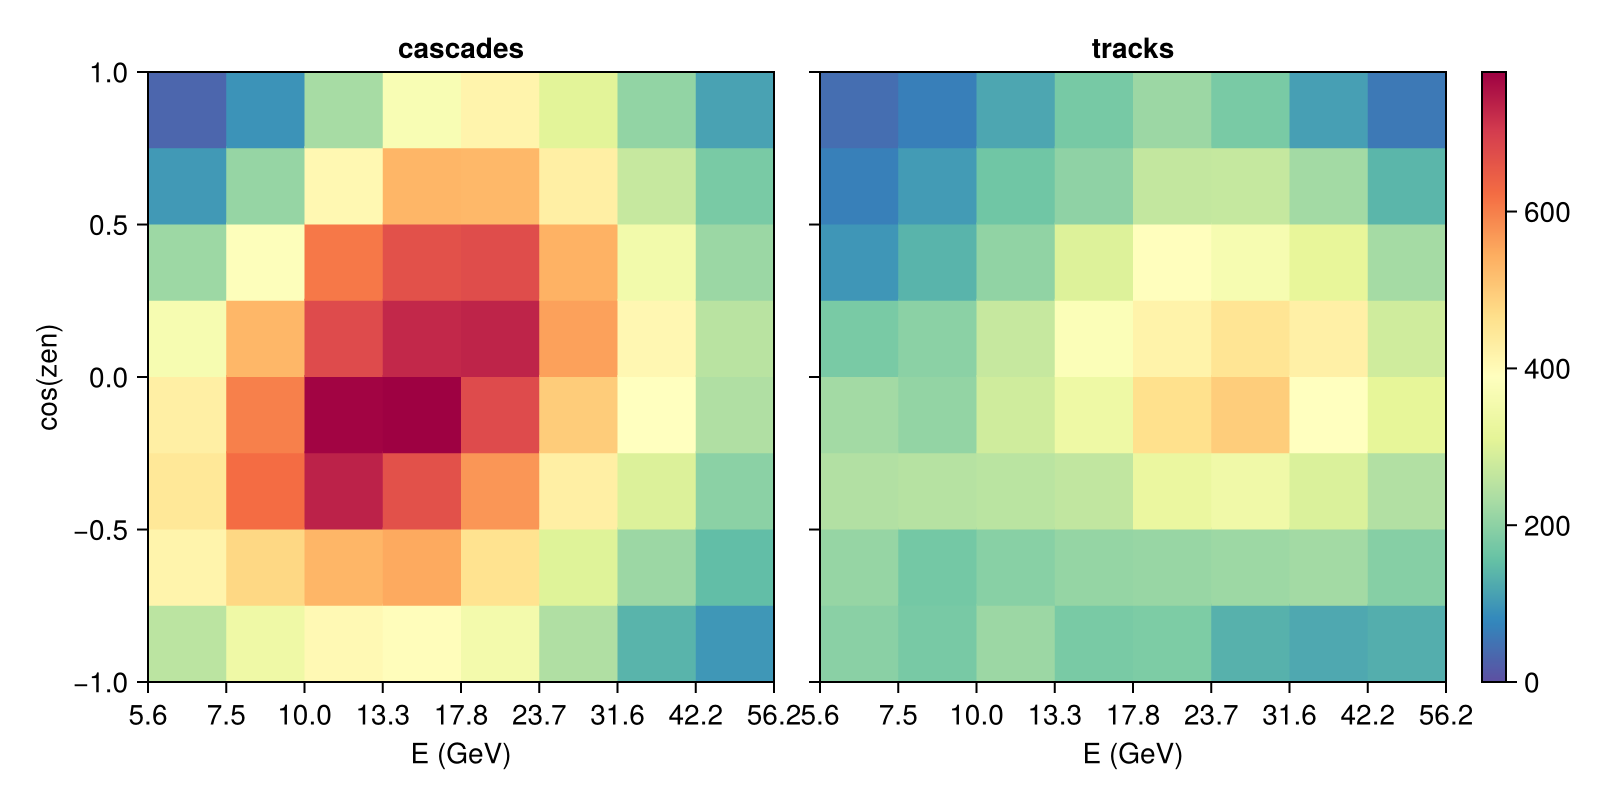

In [52]:
plotmap(data_histo)

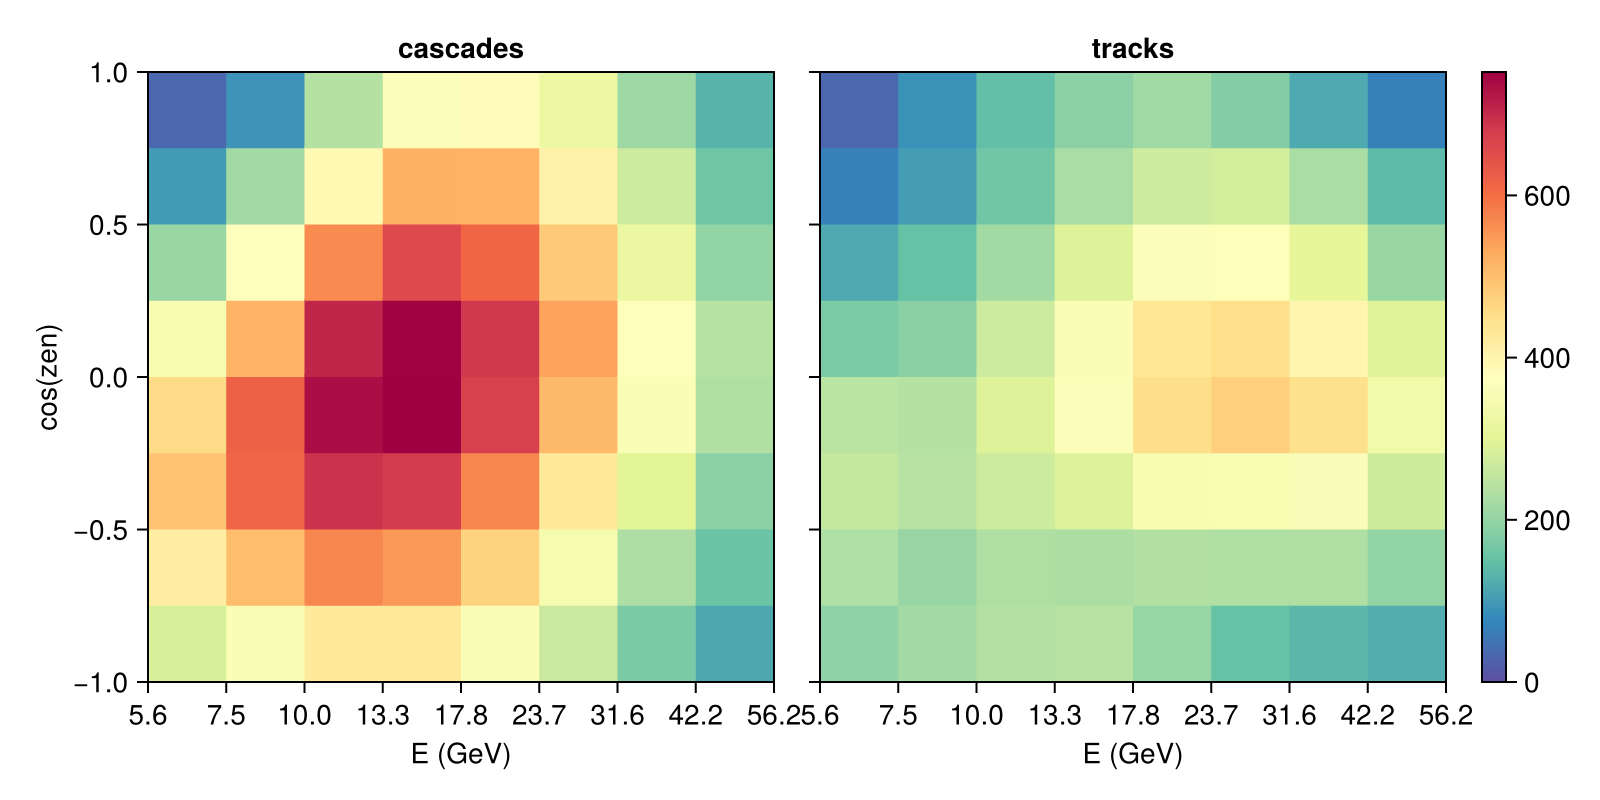

In [53]:
plotmap(expected)

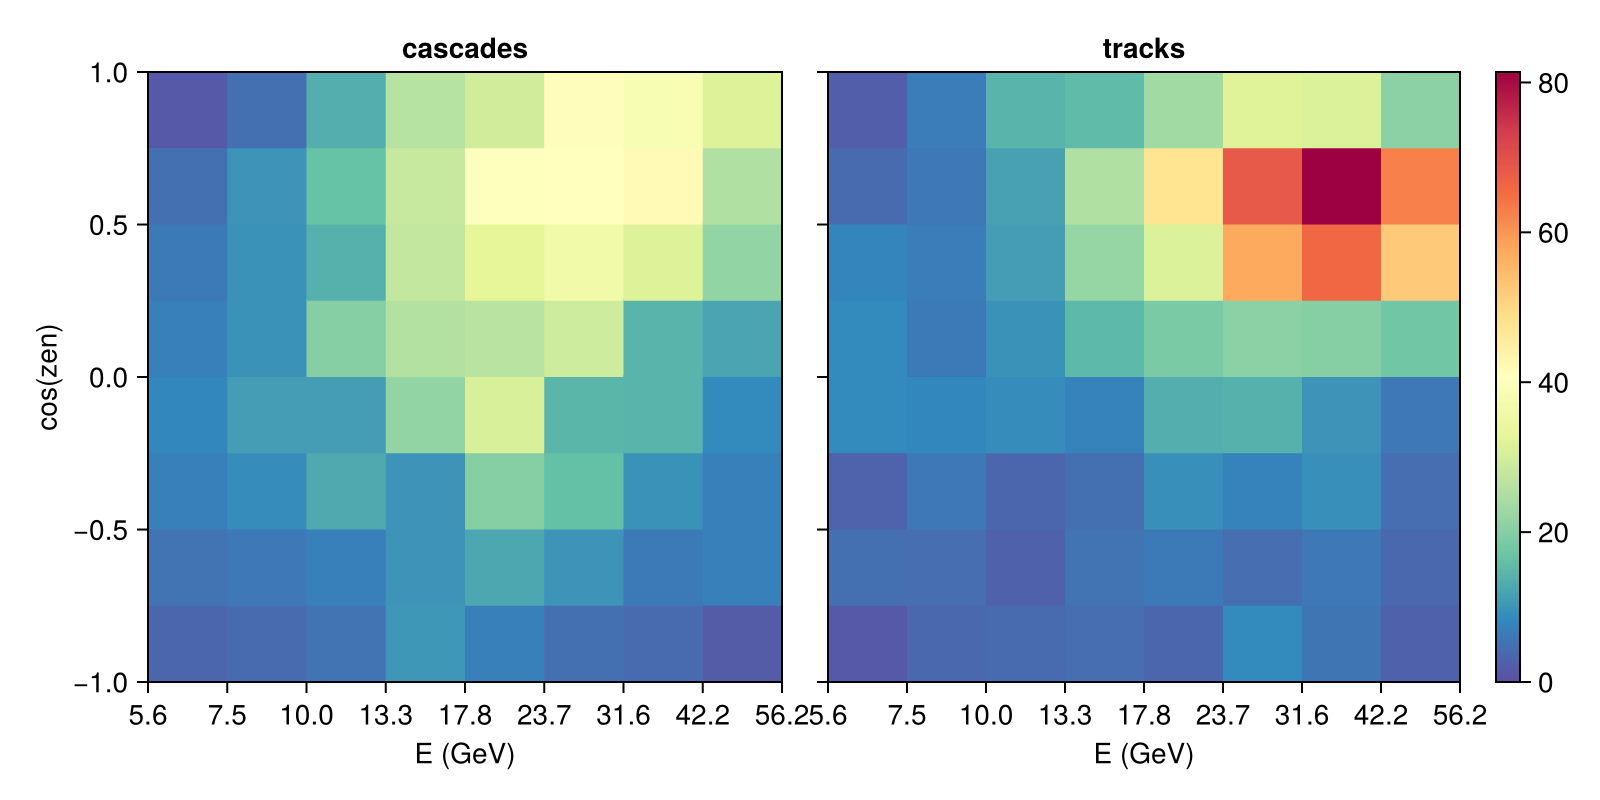

In [54]:
plotmap(muon_histo)

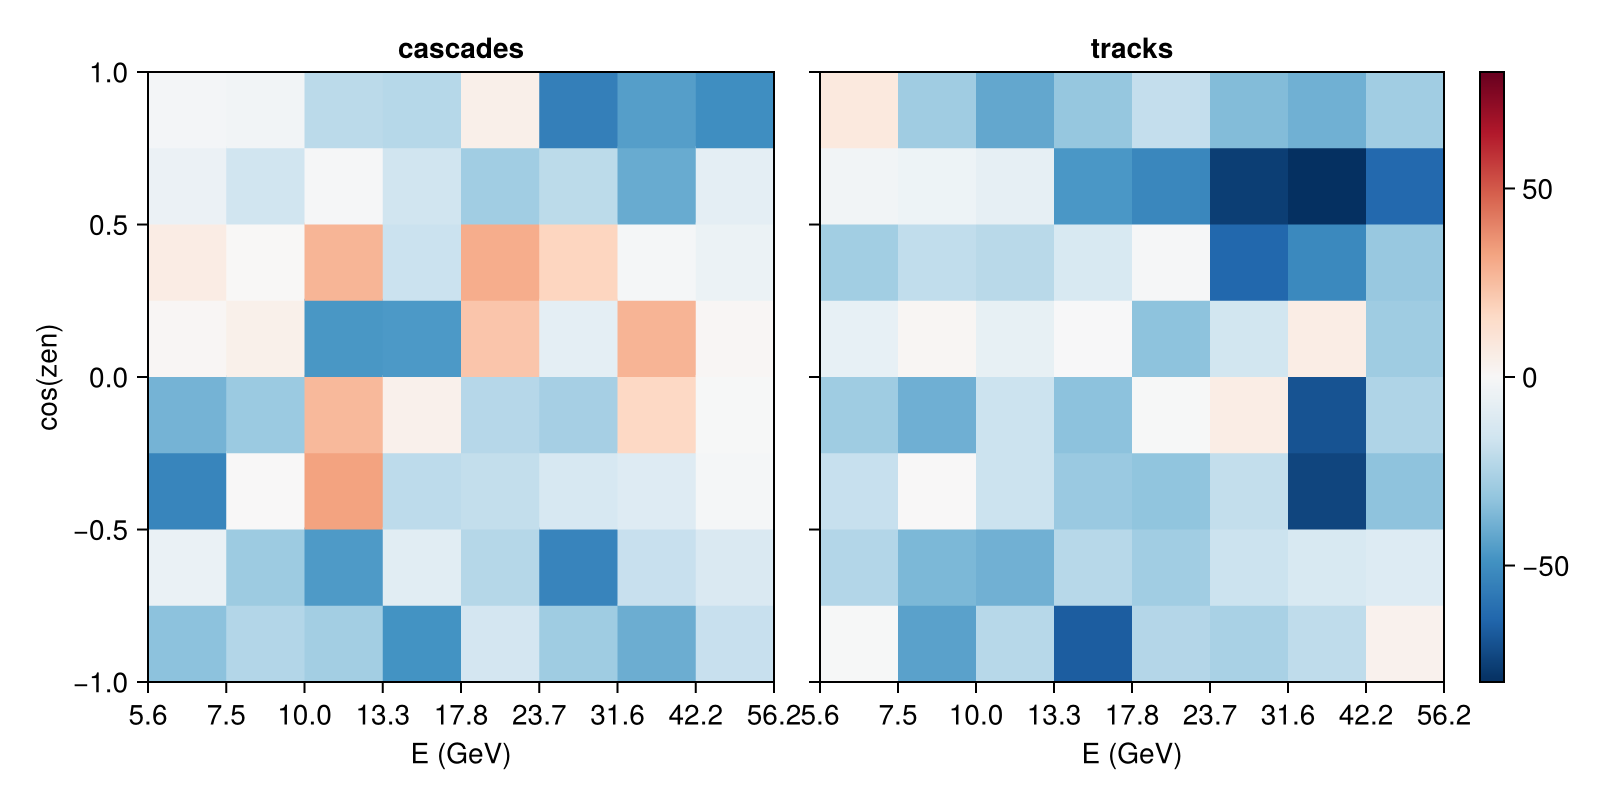

In [55]:
fig = plotmap((data_histo .- (expected .+ muon_histo)), colormap=Reverse(:RdBu), symm=true)

In [129]:
para_d = merge(params_dict, Newtrinos.osc.standard.params)

OrderedDict{Any, Any} with 8 entries:
  :deepcore_lifetime       => 2.5
  :deepcore_atm_muon_scale => 1.0
  :θ₁₂                     => 0.587252
  :θ₁₃                     => 0.145426
  :θ₂₃                     => 0.855629
  :δCP                     => 1.0
  :Δm²₂₁                   => 7.53e-5
  :Δm²₃₁                   => 0.0024753

In [130]:
prio_d = copy(para_d)

OrderedDict{Any, Any} with 8 entries:
  :deepcore_lifetime       => 2.5
  :deepcore_atm_muon_scale => 1.0
  :θ₁₂                     => 0.587252
  :θ₁₃                     => 0.145426
  :θ₂₃                     => 0.855629
  :δCP                     => 1.0
  :Δm²₂₁                   => 7.53e-5
  :Δm²₃₁                   => 0.0024753

In [131]:
collect(keys(prio_d))

8-element Vector{Any}:
 :deepcore_lifetime
 :deepcore_atm_muon_scale
 :θ₁₂
 :θ₁₃
 :θ₂₃
 :δCP
 :Δm²₂₁
 :Δm²₃₁

In [132]:
prio_d[:θ₂₃] = Newtrinos.osc.standard.priors[:θ₂₃]
prio_d[:Δm²₃₁] = Newtrinos.osc.standard.priors[:Δm²₃₁]

Uniform{Float64}(a=0.002, b=0.003)

In [144]:
vars_to_scan = (θ₂₃ = 20, Δm²₃₁=10)

(θ₂₃ = 20, Δm²₃₁ = 10)

In [145]:
res = Newtrinos.profile(l, prio_d, vars_to_scan, para_d)

NewtrinosResult((θ₂₃ = [0.5235987755982988, 0.5511566058929461, 0.5787144361875934, 0.6062722664822408, 0.6338300967768881, 0.6613879270715354, 0.6889457573661826, 0.7165035876608299, 0.7440614179554772, 0.7716192482501245, 0.7991770785447718, 0.8267349088394191, 0.8542927391340664, 0.8818505694287138, 0.9094083997233611, 0.9369662300180084, 0.9645240603126557, 0.992081890607303, 1.0196397209019503, 1.0471975511965976], Δm²₃₁ = [0.002, 0.0021111111111111113, 0.0022222222222222222, 0.0023333333333333335, 0.0024444444444444444, 0.0025555555555555557, 0.0026666666666666666, 0.002777777777777778, 0.0028888888888888888, 0.003]), (θ₁₂ = [0.5872523687443223 0.5872523687443223 … 0.5872523687443223 0.5872523687443223; 0.5872523687443223 0.5872523687443223 … 0.5872523687443223 0.5872523687443223; … ; 0.5872523687443223 0.5872523687443223 … 0.5872523687443223 0.5872523687443223; 0.5872523687443223 0.5872523687443223 … 0.5872523687443223 0.5872523687443223], Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53

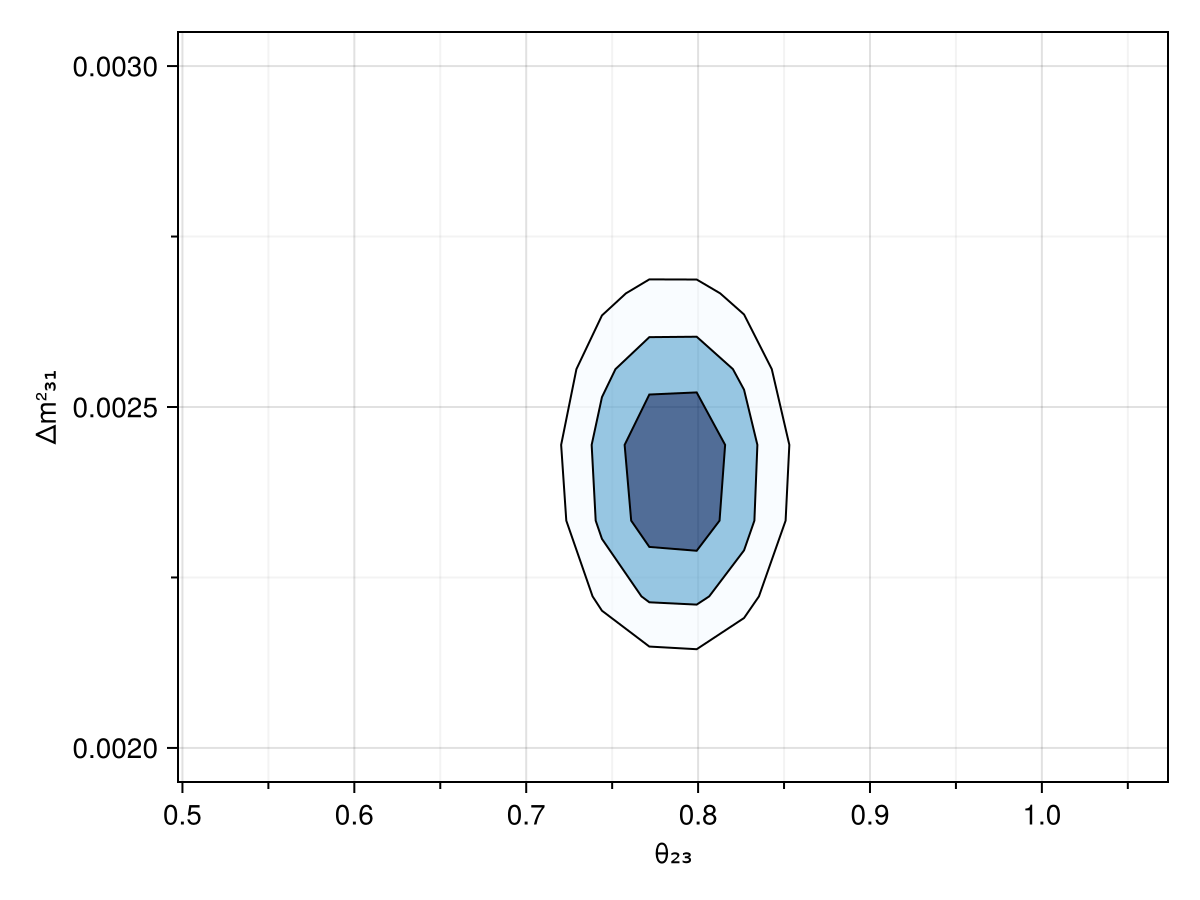

In [146]:
plot(res)